<a href="https://colab.research.google.com/github/albertomnieto/DatasetTFG/blob/master/TFG_(Regla_de_Pareto_y_segunda_aproximaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos provenientes del dataset (***winemag-data-130k-v2.csv***)

A continuación realizamos los **imports** de las *librerías* que serán necesarias para trabajar con el dataset.

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Cargamos el fichero que se encuentra en nuestro repositorio de github
dataset = 'https://raw.githubusercontent.com/albertomnieto/DatasetTFG/master/winemag-data-130k-v2.csv'
# Con la utilización de la librería de pandas leemos el fichero y separamos en columnas lo que se encuentre
# separado por comas en este
raw_dataset = pd.read_csv(dataset,sep=",",skipinitialspace=True)
raw_dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#  Preprocesamiento de datos cargados 




En esta sección realizaremos una evaluación justa del modelo,mediante la aplicación de la premisa de división del conjunto de datos en dos subconjuntos: subconjunto para entrenamiento y subconjunto para test.



Según se ha visto al cargar los datos hay ciertas columnas que poseen un valores vacíos no computables ( ***NaN -> "Not a Number"*** ), puesto que este tipo de datos no aporta nada de información haremos el siguiente filtrado de datos:

1. Buscaremos que **%** de filas se encuentran afectadas por ***NaN***, es decir, que filas poseen al menos un campo de ese valor. Si el **%** **NO** es muy elevado, se procederá a eliminar dichas filas y a trabajar con estas. En caso contrario, pasaremos al paso **2**.

2. Ahora analizaremos que columnas provocan que ese ***%*** aumente, es decir, el ***%*** de valores ***NaN*** en una columna, si este es muy elevado, prácticamente procederemos a no trabajar con esa columna, porque la información que nos proporciona es muy pobre.

3. Iremos eliminando columnas con un ***%*** muy alto de valores ***NaN*** e iremos analizando como afecta eso en el ***%*** de filas con valores ***NaN***.

## Apartado 1

In [ ]:
# Filas que componen el dataset
num_filas = len(raw_dataset)

# Filas con valores Nan
num_filasNan = len(raw_dataset[pd.isnull(raw_dataset).any(axis=1)])

na_ratioFilas = (num_filasNan/num_filas)*100
na_ratioFilas

82.775388355864

Como se puede observar el ***82.78%*** de las filas del dataset poseen al menos un valor no computable.Por lo que vamos a evaluar el ***%*** referente al apartado **2**, es decir, que papel juegan las columnas del dataset.

## Apartado 2


Calculamos la longitud del dataframe (***raw_dataset***) : *len(raw_dataset)*. Posteriormente, multiplicamos la expresión por 100 para obtener el **%** correspondiente y por úlimo, se ordenan las columnas de mayor a menor según el **%** de ***NaNs*** con el argumento **"ascending = False"**.

In [ ]:
# Porcentaje de valores vacíos no computables por columnas
na_ratioColumnas = ((raw_dataset.isnull().sum()/len(raw_dataset))*100).sort_values(ascending = False)
na_ratioColumnas

region_2                 61.136715
designation              28.825661
taster_twitter_handle    24.015357
taster_name              20.192197
region_1                 16.347493
price                     6.921544
country                   0.048472
province                  0.048472
variety                   0.000769
Unnamed: 0                0.000000
description               0.000000
points                    0.000000
title                     0.000000
winery                    0.000000
dtype: float64

## Apartado 3

Según estos resultados podemos ver claramente que el atributo ***region_2*** es realmente una columna inservible y que prácticamente no aportará nada en el estudio de los datos de este dataset, por lo que procederemos a eliminar dicha columna.

In [ ]:
# Eliminamos la columna region_2
df = raw_dataset.drop(['region_2'],axis=1)

In [ ]:
#Filas que componen el dataset
num_filas = len(df)

#Filas con valores NaN
num_filasNaN = len(df[pd.isnull(df).any(axis=1)])

print("Número de filas sin valores NaN: " + str(num_filas - num_filasNan))
na_ratioFilas = (num_filasNaN/num_filas)*100
print("Porcentaje de datos NO válidos: " + str(na_ratioFilas))

Número de filas sin valores NaN: 22387
Porcentaje de datos NO válidos: 59.90951827715414


Atendiendo a los datos anteriores, tenemos que aún sigue siendo demasiada la pérdida de datos, y ciertamente es que a mayor cantidad de datos, posterioremente mejor será la aproximación de nuestro modelo de predicción. Por esta razón se han eliminado también las siguientes columnas:

* Eliminamos las columnas: 
   - region_2
   - taster_twitter_handle
   - taster_name

### Análisis columna ***taster_name***

Antes de pasar a la eliminación de la columna  ***taster_name*** deberemos analizar si un vino es valorado por más de 1 *taster*.

In [ ]:
# Obtenemos los valores únicos de la columna taster_name
print(raw_dataset['taster_name'].unique())
print("\nNúmero de tasters diferentes: " + str(len(raw_dataset['taster_name'].unique())))

['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 nan 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']

Número de tasters diferentes: 20


In [ ]:
print(raw_dataset['title'].unique())
print("Número de titles diferentes: " + str(len(raw_dataset['title'])))

['Nicosia 2013 Vulkà Bianco  (Etna)'
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)'
 'Rainstorm 2013 Pinot Gris (Willamette Valley)' ...
 'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)'
 'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)'
 'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)']
Número de titles diferentes: 129971


In [ ]:
df2 = raw_dataset.drop(['Unnamed: 0','region_2','taster_twitter_handle','taster_name'],axis=1)

In [ ]:
# Filas que componen el dataset
num_filas = len(df2)

# Filas con valores NaN
num_filasNan = len(df2[pd.isnull(df2).any(axis=1)])

print("Datos sin valores NaN: " + str(num_filas - num_filasNan))
na_ratioFilas = (num_filasNan/num_filas)*100
print("Porcentaje de datos NO válidos: " + str(na_ratioFilas))

Datos sin valores NaN: 70175
Porcentaje de datos NO válidos: 46.00718621846412



* Eliminamos las columnas: 
   - region_2
   - taster_twitter_handle
   - taster_name
   - designation

In [ ]:
df3 = raw_dataset.drop(['Unnamed: 0','region_2','taster_twitter_handle','taster_name','designation'],axis=1)

In [ ]:
# Filas que componen el dataset
num_filas = len(df3)

# Filas con valores NaN
num_filasNan = len(df3[pd.isnull(df3).any(axis=1)])

print("Datos sin valores NaN: " + str(num_filas - num_filasNan))
na_ratioFilas = (num_filasNan/num_filas)*100
print("Porcentaje de datos NO válidos: " + str(na_ratioFilas))

Datos sin valores NaN: 101400
Porcentaje de datos NO válidos: 21.982596117595463


Podríamos quedarnos con aproximadamente con el ***78%*** de las filas del dataset (***70 175 filas***), pero deberíamos evaluar en primer lugar que tan importante es para nuestro análisis la columna **designation**.

Si la consideramos imprescindible,deberíamos tener en cuenta que nos quedaríamos con el ***53,993%*** (***101 400 filas***) de las filas del dataset.

Finalmente se ha considerado que la columna **designation** es importante para nuestro modelo de predicción, luego tenemos ***101 400*** filas refinadas del dataset inicial con las cuales comenzaremos a trabajar.

In [ ]:
dataset_refinado = df2
raw_dataset_refinado = dataset_refinado[~pd.isnull(dataset_refinado).any(axis=1)]
raw_dataset_refinado

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


## Manipulación de datos

El ***dataset refinado*** que hemos obtenido es heterogéneo, aunque principalmente se encuentra compuesto por datos discretos. Con respecto a estos últimos vamos, antes de ejecutar un pre-procesamiento de estos, a ver cuantos valores independientes conforman cada una de las columnas del dataset. A partir de este estudio definiremos dos vertientes:

1. Si el rango de valores distintos en una columna se encuentra entre  **[0, 25]**  realizaremos un pre-procesamiento empleando la técnica denominada *One-Hot-Encoding*, que consiste en dividir una característica (columna) en tantas características como posibles valores pueda tomar la característica original y asignar el valor 0 ó 1 a cada una de estas nuevas características  en función del valor de la original.

2. Si el rango de valores distintos en una columna excede a *25* deberemos aplicar una ingeniería de características para dichas columnas.

*Referencia*: El rango de valores es tomado, debido a que una gran cantidad de valores/características distintas derivadas de una característica original, no posibilitaría un pre-procesamiento óptimo para el modelo de datos.

### Obtención de valores únicos por característica

#### Característica ***country***

In [ ]:
print(raw_dataset_refinado['country'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['country'].unique()))  + " resultados únicos.")

['US' 'Spain' 'Italy' 'France' 'Argentina' 'Australia' 'Canada']

Luego hay 7 resultados únicos.


In [ ]:
country_list = pd.Series(raw_dataset_refinado['country'].value_counts())
count_country = [] 
country = []
for i in country_list:
  count_country.append(i)
for i in raw_dataset_refinado['country'].unique():
  country.append(i)
df_country = pd.DataFrame({'country': country,
                            'repeticiones': count_country })
df_country

,country,repeticiones
0,US,36558
1,Spain,11973
2,Italy,11782
3,France,5249
4,Argentina,2821
5,Australia,1616
6,Canada,176


Text(0.5, 1.0, 'Vinos por países')

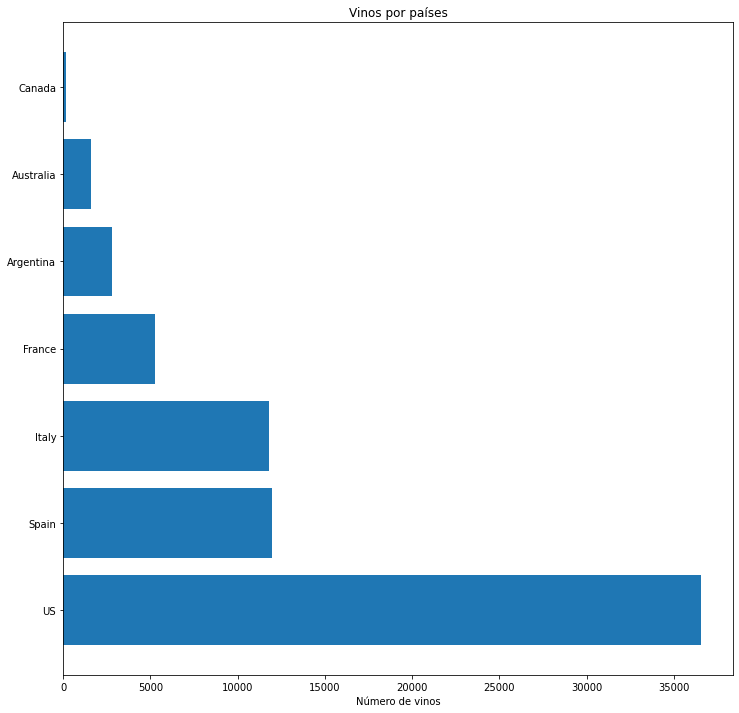

In [ ]:
# Importamos librería para presentar un resumen mediante gráficas
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
pos_y = np.arange(len(country))
plt.barh(pos_y,count_country,align = 'center')
plt.yticks(pos_y, country)
plt.xlabel('Número de vinos')
plt.title("Vinos por países")

#### Característica ***description***

In [ ]:
print(raw_dataset_refinado['description'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['description'].unique()))  + " resultados únicos.")

['Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.'
 "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew."
 'Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.'
 ...
 "While it's rich, this beautiful dry wine also offers considerable freshness. Acidity cuts easily through the ripe white fruit, pear and red apples, allowing room for spice that provides a contrasting aftertaste."
 'Well-drained gravel soil gives this wine its crisp and dr

#### Característica ***designation***

In [ ]:
print(raw_dataset_refinado['designation'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['designation'].unique()))  + " resultados únicos.")

['Reserve Late Harvest' "Vintner's Reserve Wild Child Block"
 'Ars In Vitro' ... 'Jurassic Park Vineyard Old Vines' 'Pedernal'
 'Lieu-dit Harth Cuvée Caroline']

Luego hay 29317 resultados únicos.


#### Característica ***province***

In [ ]:
print(raw_dataset_refinado['province'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['province'].unique()))  + " resultados únicos.")

['Michigan' 'Oregon' 'Northern Spain' 'Sicily & Sardinia' 'Alsace'
 'California' 'Other' 'Mendoza Province' 'Virginia' 'Southern Italy'
 'Beaujolais' 'Bordeaux' 'Central Italy' 'Washington' 'Champagne'
 'South Australia' 'France Other' 'Tuscany' 'New York' 'Piedmont'
 'Central Spain' 'Southwest France' 'Northeastern Italy' 'Burgundy'
 'Veneto' 'Rhône Valley' 'Catalonia' 'Victoria' 'Italy Other'
 'Loire Valley' 'Lombardy' 'Ontario' 'Provence' 'Idaho' 'Levante' 'Texas'
 'Australia Other' 'Languedoc-Roussillon' 'Galicia' 'Northwestern Italy'
 'Andalucia' 'Western Australia' 'Pennsylvania' 'New Jersey'
 'Spanish Islands' 'Tasmania' 'New Mexico' 'Nevada' 'Spain Other'
 'Colorado' 'Arizona' 'British Columbia' 'Missouri' 'Massachusetts'
 'Illinois' 'New South Wales' 'Ohio' 'North Carolina' 'Vermont' 'Kentucky'
 'Connecticut' 'Iowa' 'Rhode Island' 'Canada Other' 'Hawaii']

Luego hay 65 resultados únicos.


In [ ]:
# Repetición de las distintas variedades de vinos
province_list = pd.Series(raw_dataset_refinado['province'].value_counts())
count_province = [] 
province = []
for i in province_list:
  count_province.append(i)
for i in raw_dataset_refinado['province'].unique():
  province.append(i)
df_province = pd.DataFrame({'province': province,
                            'repeticiones': count_province })
df_province


,province,repeticiones
0,Michigan,24264
1,Oregon,5850
2,Northern Spain,3778
3,Sicily & Sardinia,3285
4,Alsace,3031
...,...,...
60,Connecticut,1
61,Iowa,1
62,Rhode Island,1
63,Canada Other,1


Text(0.5, 1.0, 'Vinos por provincias')

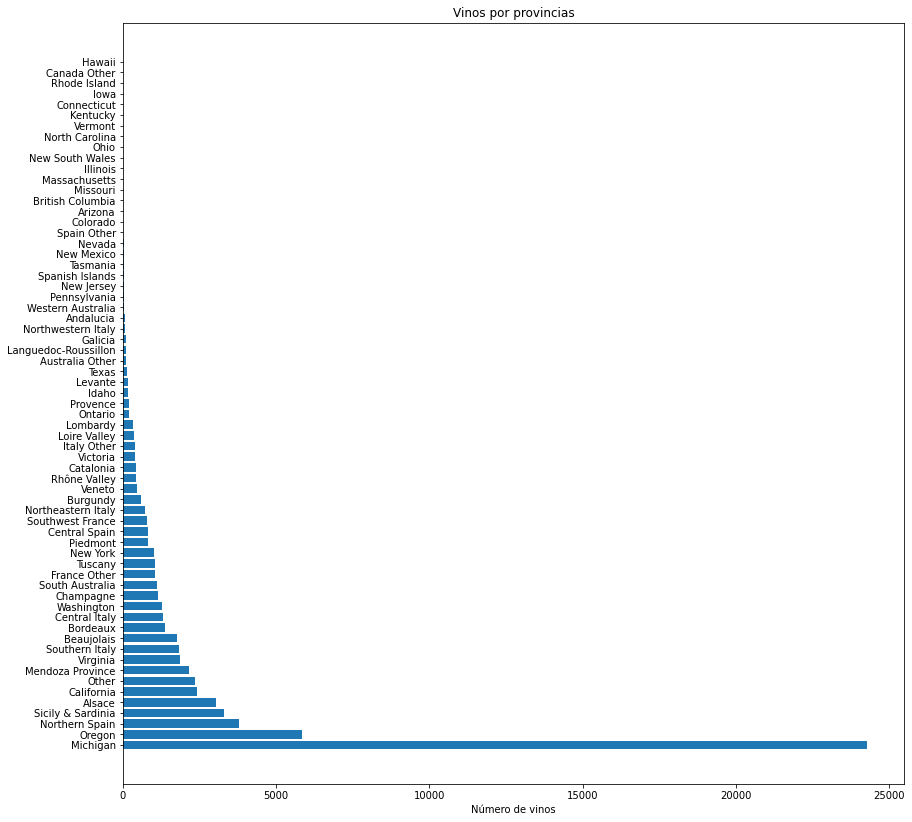

In [ ]:
plt.figure(figsize=(14,14))
pos_y = np.arange(len(province))
plt.barh(pos_y,count_province,align = 'center')
plt.yticks(pos_y, province)
plt.xlabel('Número de vinos')
plt.title("Vinos por provincias")

#### Característica ***region_1***

In [ ]:
print(raw_dataset_refinado['region_1'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['region_1'].unique()))  + " resultados únicos.")

['Lake Michigan Shore' 'Willamette Valley' 'Navarra' ... 'Del Veneto'
 'Bardolino Superiore' 'Paestum']

Luego hay 1109 resultados únicos.


#### Característica ***variety***

In [ ]:
print(raw_dataset_refinado['variety'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['variety'].unique()))  + " resultados únicos.")

['Riesling' 'Pinot Noir' 'Tempranillo-Merlot' 'Frappato' 'Pinot Gris'
 'Cabernet Sauvignon' 'Malbec' 'Tempranillo Blend' 'Red Blend'
 'White Blend' 'Merlot' "Nero d'Avola" 'Primitivo' 'Gamay' 'Inzolia'
 'Monica' 'Bordeaux-style White Blend' 'Chardonnay' 'Grillo' 'Sangiovese'
 'Cabernet Franc' 'Champagne Blend' 'Sauvignon Blanc'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Petit Manseng'
 'Rosé' 'Zinfandel' 'Vernaccia' 'Meritage' 'Viognier' 'Vermentino'
 'Grenache Blanc' 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon'
 'Gewürztraminer' 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Prugnolo Gentile' 'G-S-M'
 'Verdejo' 'Pinot Bianco' 'Shiraz' 'Montepulciano' 'Grenache'
 'Carignan-Grenache' 'Savagnin' 'Cabernet Sauvignon-Syrah' 'Prosecco'
 'Sparkling Blend' 'Muscat' 'Muscadelle' 'Shiraz-Viognier' 'Pinot Grigio'
 'Tempranillo' 'Cortese' 'Mencía' 'Nerello Mascalese' 'Melon'
 'Rhône-style White Blend' 'Vidal' 'Pinot Blanc' 'Cannona

#### Característica ***winery***

In [ ]:
print(raw_dataset_refinado['winery'].unique())
print("\nLuego hay "+ str(len(raw_dataset_refinado['winery'].unique()))  + " resultados únicos.")

['St. Julian' 'Sweet Cheeks' 'Tandem' ... 'Tollot Beaut et Fils'
 'Bodegas Eidosela' 'Penedo Borges']

Luego hay 10030 resultados únicos.


#### Conclusión

In [ ]:
print("Número de valores únicos por característica\n")
conclusion = pd.DataFrame({'country' : [len(raw_dataset_refinado['country'].unique())], 
                           'description': [len(raw_dataset_refinado['description'].unique())],
                           'designation': [len(raw_dataset_refinado['designation'].unique())],
                           'province': [len(raw_dataset_refinado['province'].unique())],
                           'region_1': [len(raw_dataset_refinado['region_1'].unique())],
                           'variety': [len(raw_dataset_refinado['variety'].unique())],
                           'winery': [len(raw_dataset_refinado['winery'].unique())] })
conclusion


Número de valores únicos por característica



,country,description,designation,province,region_1,variety,winery
0,7,64757,29317,65,1109,473,10030


La característica que será procesada mediante *One-Hot-Encoding* es: *country*.

NOTA: Se podría pre-procesar *variety* del mismo modo.

Por otro lado,se observa que prácticamente hay tantos *títulos* y *descripciones* de vinos como filas en el dataset y ciertamente, dichas columnas no aportan información alguna,de momento, por lo que serán descartadas hasta que llegue la hora de remitirnos a ellas.

## Preprocesamiento mediante *One-Hot-Encoding*

#### *One-Hot-Encoding* (**country**)

In [ ]:
# Usamos la librería para poder usar el método OneHotEncoder()
import sklearn
from sklearn import preprocessing

# Se aplica One-Hot-Encoding para country
country = np.array(raw_dataset_refinado[['country']])

one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
one_hot_encoder.fit(country)
country_transform = one_hot_encoder.transform(country).toarray()

print(country_transform)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### *One-Hot-Encoding* (**variety**)

In [ ]:
# Se aplica One-Hot-Encoding para variety
variety = np.array(raw_dataset_refinado[['variety']])

one_hot_encoder.fit(variety)
variety_transform = one_hot_encoder.transform(variety).toarray()

print(variety_transform)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Pre-procesamiento mediante *Ingeniería de características*

#### *Ingeniería de características* para ***province*** y ***region_1***

Antes de analizar otras cuestiones mucho más complejas y que van a requerir, por supuesto de más trabajo, vayamos a realizar una ingeniería de características para las columnas ***region_1*** y ***province***. Dichas columnas serán transformadas en otras dos columnas que esta vez ya contendrán valores numéricos y que representarán la ***longitud*** y la ***latitud***. 

Se analizará la característica de más especificidad (***region_1***), puesto que con esta se podrá distinguir de donde proviene el vino dentro de una misma provincia. 

Para obtener los valores de latitud y longitud de una region | provincia | país utilizaremos una API proveniente de Google Geocoding API.

In [ ]:
# Usamos la librería de Geocoders
from geopy.geocoders import Nominatim
# Creamos objeto Nominatim
geo = Nominatim(user_agent="MyApp")

# Segundo dato de la columna region_1
print(raw_dataset_refinado['region_1'].iloc[1])

# Creamos el objeto de location que contendrá la latitud y longitud
location = geo.geocode(raw_dataset_refinado['region_1'].iloc[1]);
print(location)

# Mostramos la latitud y longitud del segundo dato de la columna region_1
print(location.latitude,location.longitude)

Willamette Valley
Willamette National Cemetery, Pleasant Valley, Portland, Multnomah County, Oregon, United States
45.46110675 -122.53992221338012


Se han analizado las regiones de los vinos, pero se ha encontrado un problema y es que no todas las regiones son reconocidas por la API, por lo que se va a realizar un análisis atendiendo a la cantidad de regiones que no reconoce la API y al mismo tiempo se guardarán los nombres de estas excepciones. Dependiendo del resultado se decidirá si nos analizamos a un nivel de abstracción menor, es decir, analizar si reconoce todas las provincias.

In [ ]:
# Contador de regiones no reconocidas
count_none_region_1_values = 0                                            

# Variable que contendrá las regiones no reconocidas
none_region_1_values = []

location_list_region_1 = pd.Series(raw_dataset_refinado['region_1'].unique())

# Variable para guardar las latitudes y longitudes respectivamente
location_region_1_latitude = []
location_region_1_longitude = []

for i in location_list_region_1:
  location_region_1 = geo.geocode(i,timeout=5)
  if location_region_1 is not None:
    location_region_1_latitude.append(location_region_1.latitude)
    location_region_1_longitude.append(location_region_1.longitude)
  else: 
    count_none_region_1_values += 1
    none_region_1_values.append(i)

In [ ]:
series_region_1_latitude = pd.Series(location_region_1_latitude)
series_region_1_longitude = pd.Series(location_region_1_longitude)
raw_region_1 = pd.DataFrame({'region_1': location_list_region_1,'region_1_latitude': series_region_1_latitude,'region_1_longitude':series_region_1_longitude})
raw_region_1

,region_1,region_1_latitude,region_1_longitude
0,Lake Michigan Shore,42.203219,-86.390793
1,Willamette Valley,45.461107,-122.539922
2,Navarra,42.612549,-1.830788
3,Vittoria,36.963690,14.498142
4,Alsace,48.249176,7.407470
...,...,...,...
1104,Sonoma-Napa-Lake,NaN,NaN
1105,Sonoma County-Santa Barbara County,NaN,NaN
1106,Del Veneto,NaN,NaN
1107,Bardolino Superiore,NaN,NaN


In [ ]:
print("Número de regiones sin longitud ni latitud: " + str(count_none_region_1_values))
print("\nRegiones sin latitud,ni longitud determinada: ")
print(none_region_1_values)
print("\nTenemos las latitudes y longitudes de " + str(len(location_list_region_1) - count_none_region_1_values) + " regiones.")

Número de regiones sin longitud ni latitud: 293

Regiones sin latitud,ni longitud determinada: 
['Terre Siciliane', 'Aglianico del Vulture', "Barbera d'Alba", 'Santa Lucia Highlands', 'Dominio de Valdepusa', 'Rosso del Veronese', 'Uco Valley', 'Côte de Nuits-Villages', 'Prosecco di Conegliano', 'Bianco di Custoza', 'Prosecco di Conegliano e Valdobbiadene', 'North Fork of Long Island', 'Muscadet Sèvre et Maine', 'Amarone della Valpolicella', 'Cannonau di Sardegna', 'Horse Heaven Hills', 'Côtes de Provence Sainte-Victoire', 'Conegliano Valdobbiadene Prosecco Superiore', 'Gambellara Classico', 'Dogliani Superiore', 'Colli della Toscana Centrale', 'Calchaquí Valley', 'Verdicchio dei Castelli di Jesi Classico', 'Beaujolais-Villages', 'Blaye Côtes de Bordeaux', 'Yorkville Highlands', 'Greco di Tufo', 'Primitivo di Manduria', 'Amarone della Valpolicella Classico', 'Pouilly-Fumé', 'Happy Canyon of Santa Barbara', 'Crémant de Jura', 'Hudson River Region', 'Paso Robles Willow Creek District', 'D

In [ ]:
# Contador de provincias no reconocidas
count_none_province_values = 0

# Variable que contendrá las provincias no reconocidas
none_province_values = []

location_list_province = pd.Series(raw_dataset_refinado['province'].unique())

# Variable para guardar las latitudes y longitudes respectivamente
location_province_latitude = []
location_province_longitude = []

for i in location_list_province:
  location_province = geo.geocode(i,timeout=3)
  if location_province is not None:
    location_province_latitude.append(location_province.latitude)
    location_province_longitude.append(location_province.longitude)
  else: 
    count_none_province_values += 1
    none_province_values.append(i)

In [ ]:
# Obtención de todas las provincias
cont = 1
for i in location_list_province:
  if cont%5 !=0 and cont!=65:
    print(i, end=", ")
    cont +=1
  elif cont !=65:   
    print(i, end=",")
    print()
    cont +=1
  else:  
    print(i, end=".")

Michigan, Oregon, Northern Spain, Sicily & Sardinia, Alsace,
California, Other, Mendoza Province, Virginia, Southern Italy,
Beaujolais, Bordeaux, Central Italy, Washington, Champagne,
South Australia, France Other, Tuscany, New York, Piedmont,
Central Spain, Southwest France, Northeastern Italy, Burgundy, Veneto,
Rhône Valley, Catalonia, Victoria, Italy Other, Loire Valley,
Lombardy, Ontario, Provence, Idaho, Levante,
Texas, Australia Other, Languedoc-Roussillon, Galicia, Northwestern Italy,
Andalucia, Western Australia, Pennsylvania, New Jersey, Spanish Islands,
Tasmania, New Mexico, Nevada, Spain Other, Colorado,
Arizona, British Columbia, Missouri, Massachusetts, Illinois,
New South Wales, Ohio, North Carolina, Vermont, Kentucky,
Connecticut, Iowa, Rhode Island, Canada Other, Hawaii.

In [ ]:
print("Número de provincias sin longitud ni latitud: " + str(count_none_province_values))
print("\nProvincias sin latitud,ni longitud determinada: ")
print(none_province_values)

Número de provincias sin longitud ni latitud: 1

Provincias sin latitud,ni longitud determinada: 
['Italy Other']


Como podemos observar hay provincias que no están definidas de una manera correcta para ser geolocalizables y ofrecer a partir de ellas una longitud y latitud precisas (***ejemplo:*** **'Northern Spain'**, **'Other'**, **'Canada Other'**, etc).

Por lo tanto para ello haremos un refactoring de dichos valores de manera que al usar la ***API Nominatim***, nos muestre latitudes y longitudes correctas.

Para esto necesitamos hacerlo en dos pasos:
1. Cambiar *location_list_province*.
2. Cambiar el dataset refinado atendiendo a los cambios realizados a *location_list_province*.

In [ ]:
# La provincia que empiece por Other o termine por Other será
# refactorizada quitando esta parte del string.
location_list_province_refact = []
for i in location_list_province:
  if i.endswith('Other') and not i.startswith('Other'):
    subArr = i.split(' ')
    location_list_province_refact.append(subArr[0])
  elif not i.endswith('Other') and not i.startswith('Other'):
    location_list_province_refact.append(i)  

In [ ]:
# Obtención de las provincias tras el refactoring
cont_refact = 1
for i in location_list_province_refact:
  if cont_refact%5 !=0 and cont_refact!=64:
    print(i, end=", ")
    cont_refact +=1
  elif cont_refact !=64:   
    print(i, end=",")
    print()
    cont_refact +=1
  else:  
    print(i, end=".")

Michigan, Oregon, Northern Spain, Sicily & Sardinia, Alsace,
California, Mendoza Province, Virginia, Southern Italy, Beaujolais,
Bordeaux, Central Italy, Washington, Champagne, South Australia,
France, Tuscany, New York, Piedmont, Central Spain,
Southwest France, Northeastern Italy, Burgundy, Veneto, Rhône Valley,
Catalonia, Victoria, Italy, Loire Valley, Lombardy,
Ontario, Provence, Idaho, Levante, Texas,
Australia, Languedoc-Roussillon, Galicia, Northwestern Italy, Andalucia,
Western Australia, Pennsylvania, New Jersey, Spanish Islands, Tasmania,
New Mexico, Nevada, Spain, Colorado, Arizona,
British Columbia, Missouri, Massachusetts, Illinois, New South Wales,
Ohio, North Carolina, Vermont, Kentucky, Connecticut,
Iowa, Rhode Island, Canada, Hawaii.

In [ ]:
# Se vuelven a hallar las latitudes y longitudes tras el 
# refactoring realizado
count_none_province_values = 0
none_province_values = []
location_province_latitude = []
location_province_longitude = []
for i in location_list_province_refact:
  location_province = geo.geocode(i,timeout=3)
  if location_province is not None:
    location_province_latitude.append(location_province.latitude)
    location_province_longitude.append(location_province.longitude)
  else: 
    count_none_province_values += 1
    none_province_values.append(i)

In [ ]:
print("Número de provincias sin longitud ni latitud: " + str(count_none_province_values))
print("\nProvincias sin latitud,ni longitud determinada: ")
print(none_province_values)

Número de provincias sin longitud ni latitud: 0

Provincias sin latitud,ni longitud determinada: 
[]


Ahora podemos observar que mínimo ya encuentra todas las longitudes y latitudes de las provincias proporcionadas.La pregunta ahora es: ***¿Son correctas esas latitudes y longitudes?***

In [ ]:
# Realizamos una pequeña prueba que consiste en la operación inversa de obtener
# las latitudes y longitudes para comprobar si el valor de estas es correcto
print(geo.geocode('Michigan'))
print("Latitud: " + str(geo.geocode('Michigan').latitude))
print("Longitud: " + str(geo.geocode('Michigan').longitude))
geo.reverse("43.6211955,-84.6824346").address

Michigan, United States
Latitud: 43.6211955
Longitud: -84.6824346


'Chippewa Trail, Chippewa Township, Isabella County, Michigan, 48585, United States'

Así comprobaremos mediante un bucle si las latitudes y longitudes coinciden con la provincia.

In [ ]:
# Variable que tomará dos valores: Correcto/Incorrecto
# Correcto: si la latitud y longitud comprobada mediante el método reverse da como
# resultado la misma dirección
# Incorrecto: en caso contrario

comprobaciones = []

for i in location_list_province_refact:
  latitude = geo.geocode(i,timeout=5).latitude
  longitude = geo.geocode(i,timeout=5).longitude
  if i in geo.reverse(str(latitude) + "," + str(longitude)).address:
    comprobaciones.append("Correcto")
  else:  
    comprobaciones.append("Incorrecto")

In [ ]:
# Se muestran las provincias con comprobaciones=Incorrecto
index = 0
df_comprobaciones = pd.DataFrame({'province': location_list_province_refact, 'comprobaciones': comprobaciones })    
for i in df_comprobaciones['comprobaciones']:
  if i == str('Incorrecto'):
    print(df_comprobaciones.iloc[index])
    index+=1
  else:
    index+=1     

province          Northern Spain
comprobaciones        Incorrecto
Name: 2, dtype: object
province          Sicily & Sardinia
comprobaciones           Incorrecto
Name: 3, dtype: object
province              Alsace
comprobaciones    Incorrecto
Name: 4, dtype: object
province          Mendoza Province
comprobaciones          Incorrecto
Name: 6, dtype: object
province          Southern Italy
comprobaciones        Incorrecto
Name: 8, dtype: object
province          Central Italy
comprobaciones       Incorrecto
Name: 11, dtype: object
province             Tuscany
comprobaciones    Incorrecto
Name: 16, dtype: object
province          Central Spain
comprobaciones       Incorrecto
Name: 19, dtype: object
province          Southwest France
comprobaciones          Incorrecto
Name: 20, dtype: object
province          Northeastern Italy
comprobaciones            Incorrecto
Name: 21, dtype: object
province            Burgundy
comprobaciones    Incorrecto
Name: 22, dtype: object
province          Rhô

In [ ]:
incorrect_values = 0
for i in df_comprobaciones['comprobaciones']:
  if i is str('Incorrecto'):
   incorrect_values+=1
print(incorrect_values)    

21


In [ ]:
print(geo.geocode('Northern Spain'))
print(geo.geocode('Sicily & Sardinia'))
print(geo.geocode('Alsace'))
print(geo.geocode('Mendoza Province'))

Spain Place, Darwin City, Darwin, City of Darwin, Northern Territory, 0800, Australia
Sicily by Car, Via dei Trasvolatori, Su Masu/Elmas, Cagliari, Sardigna/Sardegna, 09030, Italia
Alsace, France métropolitaine, France
Mendoza, El Carmen, Chincha, Ica, Perú


Un poco raro la última comprobación, y es que para esta dataset  **" no hay ningún vino que pertenezca a Perú "** , de hecho Perú no se encuentra en este dataset, es claramente erróneo este dato.

Según se ha ido realizando esta ruta de refactorización se ha hecho cada vez más complicado, pues hay que realizar una refactorización importante, es decir hay que refactorizar unas 21 provincias. Es verdad, que es una buena cantidad, pero podemos hacerla de manera manual, y es el siguiente paso a realizar.



Eso sí, primero nos desharemos de aquellas provincias **'Other'** que no ofrecen mucha información, a la vez que analizamos que cantidad de datos hemos perdido, tras esta operación. Luego calcularemos las ***latitudes*** y ***longitudes*** de los países que seguro necesitaremos para refactorizaciones del estilo **'Italy Other'**.Posteriormente, retomaremos lo que ya hemos hecho anteriormente para concluir dicha operación de refactorización.

In [ ]:
raw_dataset_refinado

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [ ]:
# Borrar filas donde provincia == 'Other'
raw_dataset_refinado = raw_dataset_refinado.drop(raw_dataset_refinado[raw_dataset_refinado['province'] == 'Other'].index)
raw_dataset_refinado

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [ ]:
# Cálculo del porcentaje del dataset restante tras eliminación de filas con 
# province = 'Other'
(69777*100) /70175

99.43284645529035

In [ ]:
# Porcentaje que representa la eliminación de filas con province = 'Other'
100 - 99.43284645529035

0.5671535447096545

Luego tenemos que sólo se han perdido aproximadamente el ***0.6%*** de los datos que ya teníamos limpios del dataset original, y la verdad es que son buenas noticias.

In [ ]:
raw_dataset_latitude_longitude = raw_dataset_refinado
raw_dataset_latitude_longitude = raw_dataset_latitude_longitude.drop(['description','designation','points','price','variety','winery'],axis=1)
raw_dataset_latitude_longitude

,country,province,region_1,title
3,US,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
5,Spain,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
6,Italy,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria)
9,France,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...
...,...,...,...,...
129959,France,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...
129962,Italy,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...
129965,France,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...
129968,France,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...


Primero calcularemos las ***latitudes*** y ***longitudes*** de los países, pues nos serán útiles más adelante.

In [ ]:
# Hallamos latitudes y longitudes de los países:
location_country_latitude = []
location_country_longitude = []
location_list_country = pd.Series(raw_dataset_refinado['country'].unique())
for i in location_list_country :
  location_country = geo.geocode(i,timeout=3)
  if location_country is not None:
    location_country_latitude.append(location_country.latitude)
    location_country_longitude.append(location_country.longitude)
df_country_latitude_longitude = pd.DataFrame({'country': location_list_country, 'country_latitude': location_country_latitude, 'country_longitude': location_country_longitude})   
df_country_latitude_longitude

,country,country_latitude,country_longitude
0,US,39.783730,-100.445882
1,Spain,39.326068,-4.837979
2,Italy,42.638426,12.674297
3,France,46.603354,1.888334
4,Argentina,-34.996496,-64.967282
5,Australia,-24.776109,134.755000
6,Canada,61.066692,-107.991707


In [ ]:
# Comprobamos que esos valores son correctos y creamos columna:
comprobaciones_country = []
for i in location_list_country:
  latitude = geo.geocode(i,timeout=3).latitude
  longitude = geo.geocode(i,timeout=3).longitude
  if i in geo.reverse(str(latitude) + "," + str(longitude)).address:
    comprobaciones_country.append("Correcto")
  else:  
    comprobaciones_country.append("Incorrecto")
df_comprobaciones_country = pd.DataFrame({'check': comprobaciones_country})   
df_country_latitude_longitude.join(df_comprobaciones_country)   

,country,country_latitude,country_longitude,check
0,US,39.783730,-100.445882,Incorrecto
1,Spain,39.326068,-4.837979,Incorrecto
2,Italy,42.638426,12.674297,Incorrecto
3,France,46.603354,1.888334,Correcto
4,Argentina,-34.996496,-64.967282,Correcto
5,Australia,-24.776109,134.755000,Correcto
6,Canada,61.066692,-107.991707,Correcto


In [ ]:
# Se comprueba si los valores incorrectos, realmente son incorrectos
print(geo.reverse("39.783730,-100.445882").address)
print(geo.reverse("39.326068,-4.837979").address)
print(geo.reverse("42.638426,12.674297").address)

Decatur County, Kansas, United States
Umbría del Encinarejo, Helechosa de los Montes, Badajoz, Extremadura, España
Terni, Umbria, 05100, Italia


Hay que tener cuidado con las comprobaciones y es que a veces obtenemos un check ***Incorrecto***, puesto que comprobamos un resultado en el ***idioma español*** con un valor en ***inglés***, en otro caso, ocurre por una ***abreviación***. Fuera de eso y en este caso tiene simple solución. Veremos más adelante si pasa con las ***provincias***.

In [ ]:
# Solventamos el error anteriormente comentado
comprobaciones_country = []
for i in location_list_country:
  comprobaciones_country.append("Correcto")
df_comprobaciones_country = pd.DataFrame({'check': comprobaciones_country})  
df_country_latitude_longitude = df_country_latitude_longitude.join(df_comprobaciones_country)
df_country_latitude_longitude

,country,country_latitude,country_longitude,check
0,US,39.783730,-100.445882,Correcto
1,Spain,39.326068,-4.837979,Correcto
2,Italy,42.638426,12.674297,Correcto
3,France,46.603354,1.888334,Correcto
4,Argentina,-34.996496,-64.967282,Correcto
5,Australia,-24.776109,134.755000,Correcto
6,Canada,61.066692,-107.991707,Correcto


Ahora sí, retomamos este paso final para refactorizar las provincias.

In [ ]:
# Hallamos latitudes y longitudes de las provincias:
location_province_latitude = []
location_province_longitude = []
location_list_province= pd.Series(raw_dataset_refinado['province'].unique())
for i in location_list_province:
  location_province = geo.geocode(i,timeout=3)
  if location_province is not None:
    location_province_latitude.append(location_province.latitude)
    location_province_longitude.append(location_province.longitude)
  else:
    location_province_latitude.append('None')
    location_province_longitude.append('None')
df_province_latitude_longitude = pd.DataFrame({'province':location_list_province,
                                               'province_latitude': location_province_latitude,
                                               'province_longitude': location_province_longitude})   
df_province_latitude_longitude

,province,province_latitude,province_longitude
0,Michigan,43.621195,-84.682435
1,Oregon,43.97928,-120.737257
2,Northern Spain,-12.46179,130.842336
3,Sicily & Sardinia,39.256425,9.060028
4,Alsace,48.249176,7.40747
...,...,...,...
59,Connecticut,41.65002,-72.734216
60,Iowa,41.921673,-93.31227
61,Rhode Island,41.796241,-71.599237
62,Canada Other,60.599136,-134.880251


In [ ]:
# Comprobamos que esos valores son correctos y creamos columna:
comprobaciones_province = []
for i in location_list_province:
  if geo.geocode(i,timeout=3) is None:
    comprobaciones_province.append("Incorrecto")
  else:  
    latitude = geo.geocode(i,timeout=3).latitude
    longitude = geo.geocode(i,timeout=3).longitude
    if i in geo.reverse(str(latitude) + "," + str(longitude)).address:
      comprobaciones_province.append("Correcto")
    else:  
      comprobaciones_province.append("Incorrecto")
df_comprobaciones_province = pd.DataFrame({'check': comprobaciones_province})   
df_province_latitude_longitude = df_province_latitude_longitude.join(df_comprobaciones_province)   
df_province_latitude_longitude

,province,province_latitude,province_longitude,check
0,Michigan,43.621195,-84.682435,Correcto
1,Oregon,43.97928,-120.737257,Correcto
2,Northern Spain,-12.46179,130.842336,Incorrecto
3,Sicily & Sardinia,39.256425,9.060028,Incorrecto
4,Alsace,48.249176,7.40747,Incorrecto
...,...,...,...,...
59,Connecticut,41.65002,-72.734216,Correcto
60,Iowa,41.921673,-93.31227,Correcto
61,Rhode Island,41.796241,-71.599237,Correcto
62,Canada Other,60.599136,-134.880251,Incorrecto


In [ ]:
# Se listan las provincias con comprobaciones=Incorrecto
index = 0  
for i in df_province_latitude_longitude['check']:
  if i == str('Incorrecto'):
    print(df_province_latitude_longitude.iloc[index])
    index+=1
  else:
    index+=1   

province              Northern Spain
province_latitude          -12.46179
province_longitude        130.842336
check                     Incorrecto
Name: 2, dtype: object
province              Sicily & Sardinia
province_latitude             39.256425
province_longitude             9.060028
check                        Incorrecto
Name: 3, dtype: object
province                  Alsace
province_latitude      48.249176
province_longitude       7.40747
check                 Incorrecto
Name: 4, dtype: object
province              Mendoza Province
province_latitude           -13.557756
province_longitude          -76.094564
check                       Incorrecto
Name: 6, dtype: object
province              Southern Italy
province_latitude          14.475539
province_longitude         121.02973
check                     Incorrecto
Name: 8, dtype: object
province              Central Italy
province_latitude         46.009719
province_longitude         9.282021
check                    Incorrec

In [ ]:
df_province_latitude_longitude

,province,province_latitude,province_longitude,check
0,Michigan,43.621195,-84.682435,Correcto
1,Oregon,43.97928,-120.737257,Correcto
2,Northern Spain,-12.46179,130.842336,Incorrecto
3,Sicily & Sardinia,39.256425,9.060028,Incorrecto
4,Alsace,48.249176,7.40747,Incorrecto
...,...,...,...,...
59,Connecticut,41.65002,-72.734216,Correcto
60,Iowa,41.921673,-93.31227,Correcto
61,Rhode Island,41.796241,-71.599237,Correcto
62,Canada Other,60.599136,-134.880251,Incorrecto


#### Refactorización de las ***latitudes*** | ***longitudes*** incorrectas

In [ ]:
print("-- Northern Spain --") 
print(geo.reverse("-12.4618,130.842").address)

# NOTA: Añade ruido al dataset

# Se toma un valor de una ciudad del norte de España
# Se ha tomado Álava, lugar donde se encuentran dos viñedos de los más alabados de España
print(geo.geocode("Álava").latitude)
print(geo.geocode("Álava").longitude)
print(geo.reverse("42.844072249999996,-2.6820829322126283").address)

df_province_latitude_longitude.iloc[2] = ['Northern Spain',42.844072249999996,-2.6820829322126283,'Correcto']

-- Northern Spain --
Stone House, 33, Cavenagh Street, Darwin City, Darwin, City of Darwin, Northern Territory, 0800, Australia
42.844072249999996
-2.6820829322126283
Palacio de Justicia / Justizia Jauregia, Laskarai kalea/Calle Lascaray, Lovaina, Vitoria-Gasteiz, Gasteizko kuadrilla/Cuadrilla de Vitoria, Araba/Álava, Euskadi, 01008, España


In [ ]:
print("-- Sicily & Sardinia --")
print(geo.reverse("39.2564,9.06003").address)

# En este caso es sólo un problema de traducción y por tanto del código que se ha creado 
# no ha sido eficaz para reconocer esta aserción.
print(geo.geocode("Sicilia y Sardegna").latitude)
print(geo.geocode("Sicilia y Sardegna").longitude)
print(geo.reverse("37.5010443,15.0596421").address)

df_province_latitude_longitude.iloc[3] = ['Sicily & Sardinia',37.5010443,15.0596421,'Correcto']

-- Sicily & Sardinia --
P1, Via Caduti Di Nassirya, Su Masu/Elmas, Cagliari, Sardigna/Sardegna, 09030, Italia
40.6292055
9.6819479
Via Sardegna, San Leone, Monte Po-Nesima-San Leone-Rapisardi, Catania, Sicilia, 95045, Italia


In [ ]:
print("-- Alsace --")
print(geo.reverse("48.2492,7.40747").address)

# Alsace es una región de Francia la latitud y longitud que se nos provee está dentro de esta
# región así que será tomada como válida.

-- Alsace --
D 901, Kintzheim, Sélestat-Erstein, Bas-Rhin, Grand Est, France métropolitaine, 67600, France


In [ ]:
print("-- Mendoza Province  --")
print(geo.reverse("-13.5578,-76.0946").address)

# El problema aquí es que Mendoza se analiza como una provincia de Perú y no como una de 
# Argentina que es la aserción correcta
print(geo.geocode("Mendoza Argentina").latitude)
print(geo.geocode("Mendoza Argentina").longitude)
print(geo.reverse("-34.787093049999996,-68.43818677312292").address)

df_province_latitude_longitude.iloc[6] = ['Mendoza Province',-34.787093049999996,-68.43818677312292,'Correcto']

-- Mendoza Province  --
Fundo Palo Seco, Mendoza, El Carmen, Chincha, Ica, Perú
-34.787093049999996
-68.43818677312292
Distrito Rama Caída, Departamento San Rafael, Mendoza, Argentina


In [ ]:
print("-- Southern Italy --")
print(geo.reverse("14.4755,121.03").address)

# NOTA: Añade ruido al dataset 

# Para las provincias de este tipo haremos lo mismo que para la aserción 'Northern Spain'
# Seleccionamos 'Apulia' es la región de Italia que produce más uvas y más vino pese a no tener la mayor superficie de viñedo
print(geo.geocode("Apulia").latitude)
print(geo.geocode("Apulia").longitude)
print(geo.reverse("40.9842539,16.6210027").address)

df_province_latitude_longitude.iloc[8] = ['Southern Italy',40.9842539,16.6210027,'Correcto']

-- Southern Italy --
Italy, San Antonio Valley 10 and 11, Don Bosco, Parañaque, Southern Manila District, Metro Manila, 1717, Philippines
40.9842539
16.6210027
Toritto, Bari, Puglia, Italia


In [ ]:
print("-- Central Italy --")
print(geo.reverse("46.0097,9.28202").address)

# NOTA: Añade ruido al dataset

# Para las provincias de este tipo haremos lo mismo que para la aserción 'Northern Spain'
# Seleccionamos 'Abruzzos' conocida por ser una región de grandes cooperativas y de producción masiva.
print(geo.geocode("Abruzzo").latitude)
print(geo.geocode("Abruzzo").longitude)
print(geo.reverse("42.227681,13.854983").address)

df_province_latitude_longitude.iloc[11] = ['Central Italy',42.227681,13.854983,'Correcto']

-- Central Italy --
Bar il molo i Nilus bar, Contrada del Prestino, Varenna, Olivedo, Fiumelatte, Varenna, Lecco, Lombardia, 23829, Italia
42.227681
13.854983
Dogli, Pescosansonesco, Pescara, Abruzzo, 65022, Italia


In [ ]:
print("-- France Other --")
print(geo.reverse("48.8653,2.34476").address)

# Tomaremos, en estos casos,la latitud y longitud del país
print(geo.geocode("France").latitude)
print(geo.geocode("France").longitude)
print(geo.reverse("46.603354,1.888334").address)

df_province_latitude_longitude.iloc[15] = ['France Other',46.603354,1.888334,'Correcto']

-- France Other --
& Other Stories, 35, Rue Montmartre, Quartier du Mail, Paris 2e Arrondissement, Paris, Île-de-France, France métropolitaine, 75002, France
46.603354
1.8883335
D 51, Baudry, Sarzay, La Châtre, Indre, Centre-Val de Loire, France métropolitaine, 36230, France


In [ ]:
print("-- Tuscany --")
print(geo.reverse("43.4587,11.1389").address)

# El problema aquí es que el código no reconoce aserciones en otro idioma,
# sin embargo, y como se puede apreciar esta latitud y longitud son correctas.

-- Tuscany --
Volponi, Poggibonsi, Siena, Toscana, 53036, Italia


In [ ]:
print("-- Central Spain --")
print(geo.reverse("41.9726,2.68608").address)

# NOTA: Añade ruido al dataset

# Para el centro directamente utilizaremos a Castilla La Mancha, puesto que Castilla
# es zona de vinos, tradicionalmente tintos con cuerpo, fruto del clima continental de duros inviernos, y calurosos veranos.
print(geo.geocode("Castilla La Mancha").latitude)
print(geo.geocode("Castilla La Mancha").longitude)
print(geo.reverse("39.4177902,-2.6232332").address)

df_province_latitude_longitude.iloc[19] = ['Central Spain',39.4177902,-2.6232332,'Correcto']

-- Central Spain --
Via Verda Olot - Girona, Trullas, Bescanó, Gironès, Girona, Catalunya, 17162, España
39.4177902
-2.6232332
N-301, Las Pedroñeras, Cuenca, Castilla-La Mancha, España


In [ ]:
print("-- Southwest France --")
print(geo.reverse("43.6714,-1.39066").address)

# El problema aquí es que el código no reconoce una cierta asercion,
# y como se puede apreciar esta latitud y longitud son correctas.

-- Southwest France --
Southwest, 199, Avenue des Tisserrands, Zone Artisanale Pédebert, La Tuilerie, Soorts-Hossegor, Arrondissement de Dax, Landes, Nouvelle-Aquitaine, France métropolitaine, 40150, France


In [ ]:
print("-- Northeastern Italy --")
print(geo.reverse("42.6125,-1.83079").address)

# NOTA: Añade ruido al dataset

# En este caso, se ha seleccionado Véneto y es la región vitícola italiana más variada,
# en ella se elaboran numerosos estilos de vino. Tiene tres de las denominaciones italianas más conocidas en el mundo.
print(geo.geocode("Véneto").latitude)
print(geo.geocode("Véneto").longitude)
print(geo.reverse("45.6476663,11.8665254").address)

df_province_latitude_longitude.iloc[21] = ['Northeastern Italy',45.6476663,11.8665254,'Correcto']

-- Northeastern Italy --
La Corona, Mendigorria, Navarra - Nafarroa, 31150, España
45.6476663
11.8665254
Via Leonardo da Vinci, Zona industriale San Martino di Lupari, Monastiero, San Martino di Lupari, Padova, Veneto, 35018, Italia


In [ ]:
print("-- Burgundy --")
print(geo.reverse("47.2781,4.22249").address)

# El problema aquí es que el código no reconoce una cierta asercion,
# y como se puede apreciar esta latitud y longitud son correctas.

-- Burgundy --
26, Rue des Tanneries, Saulieu, Montbard, Côte-d'Or, Bourgogne-Franche-Comté, France métropolitaine, 21210, France


In [ ]:
print("-- Rhône Valley --")
print(geo.reverse("48.2665,0.853165").address)

# En este caso, se ha comprobado y es una región vinícola francesa
# que se extiende desde Vienne al Norte hasta Arlés en el Sur.
# Podemos considerar que la latitud y longitud, son correctas.

-- Rhône Valley --
Rue de Falourde, La Borde, Souancé-au-Perche, Nogent-le-Rotrou, Eure-et-Loir, Centre-Val de Loire, France métropolitaine, 28400, France


In [ ]:
print("-- Catalonia --")
print(geo.reverse("41.8523,1.5745").address)

# El problema aquí es que el código no reconoce una cierta aserción,
# y como se puede apreciar esta latitud y longitud son correctas.

-- Catalonia --
Camí de Pinós a Matamargó, Pinós, Solsonès, Lleida, Catalunya, 08269, España


In [ ]:
print("-- Italy Other --")
print(geo.reverse("47.2781,4.22249").address)

# Tomaremos, en estos casos,la latitud y longitud del país
print(geo.reverse("41.703519,14.188595").address)

df_province_latitude_longitude.iloc[27] = ['Italy Other',41.703519,14.188595,'Correcto']

-- Italy Other --
26, Rue des Tanneries, Saulieu, Montbard, Côte-d'Or, Bourgogne-Franche-Comté, France métropolitaine, 21210, France
Forlì del Sannio, Isernia, Molise, Italia


In [ ]:
print("-- Loire Valley --")
print(geo.reverse("47.603,1.36654").address)

# El problema aquí es que el código no reconoce una cierta aserción,
# y como se puede apreciar estas latitudes y longitudes son correctas.

-- Loire Valley --
Loire, La Chaussée-Saint-Victor, Blois, Loir-et-Cher, Centre-Val de Loire, France métropolitaine, 41260, France


In [ ]:
print("-- Lombardy --")
print(geo.reverse("45.5704,9.77325").address)

# El problema aquí es que el código no reconoce una cierta aserción,
# y como se puede apreciar estas latitudes y longitudes son correctas.

-- Lombardy --
Via Ezio Zambianchi, Martinengo, Bergamo, Lombardia, 24057, Italia


In [ ]:
print("-- Australia Other --")
print(geo.reverse("-35.7285,142.361").address)

# Tomaremos, en estos casos,la latitud y longitud del país
print(geo.reverse("-24.776109,134.755000").address)

df_province_latitude_longitude.iloc[35] = ['Australia Other',-24.776109,134.755000,'Correcto']

-- Australia Other --
Hopetoun Fuel & Nursery Supplies, 50, Hopetoun - Rainbow Road, Hopetoun, Shire of Yarriambiack, Victoria, 3396, Australia
Ghan, Macdonnell Region, Northern Territory, 0872, Australia


In [ ]:
print("-- Languedoc-Roussillon --")
print(geo.reverse("43.6542,3.67467").address)

# La ubicación era correcta, sin embargo, esta puede que sea incluso más precisa, por ese motivo,
# se utilizará esta última
print(geo.geocode("Languedoc,France").latitude)
print(geo.geocode("Languedoc,France").longitude)
print(geo.reverse("43.6108676,1.3301059").address)

df_province_latitude_longitude.iloc[36] = ['Languedoc-Roussillon',43.6108676,1.3301059,'Correcto']

-- Languedoc-Roussillon --
Route de la Boissière, Montarnaud, Lodève, Hérault, Occitanie, France métropolitaine, 34570, France
43.6108676
1.3301059
Languedoc, Place du Languedoc, Plein Centre, Colomiers, Toulouse, Haute-Garonne, Occitanie, France métropolitaine, 31770, France


In [ ]:
print("-- Northwestern Italy --")
print(geo.reverse("59.9359,30.3175").address)

# NOTA: Añade ruido al dataset

# En este caso, se ha seleccionado Piamonte, pues sus viñedos representan la sexta parte de la superficie total de viñedo de Italia
print(geo.geocode("Piamonte").latitude)
print(geo.geocode("Piamonte").longitude)
print(geo.reverse("45.060735,7.923549").address)

df_province_latitude_longitude.iloc[38] = ['Northwestern Italy',45.060735,7.923549,'Correcto']

-- Northwestern Italy --
Талион Империал отель, набережная реки Мойки, Апраксин двор, округ № 78, Санкт-Петербург, Северо-Западный федеральный округ, 191186, Россия
45.060735
7.923549
Barbaso, Moncucco Torinese, Asti, Piemonte, 14024, Italia


In [ ]:
print("-- Andalucia --")
print(geo.reverse("37.34,-4.58116").address)

# El problema aquí es que el código no reconoce una cierta aserción,
# y como se puede apreciar estas latitudes y longitudes son correctas.

-- Andalucia --
Lucena, Córdoba, Andalucía, España


In [ ]:
print("-- Spanish Islands --")
print(geo.reverse("55.9404,-134.129").address)

# Solventamos el problema, pues no reconoce 'Spanish Islands' para la geocolización
print(geo.geocode("Islas Canarias").latitude)
print(geo.geocode("Islas Canarias").longitude)
print(geo.reverse("28.2935785,-16.621447121144122").address)

df_province_latitude_longitude.iloc[43] = ['Spanish Islands',28.2935785,-16.621447121144122,'Correcto']

-- Spanish Islands --
Petersburg Borough, Alaska, United States
28.2935785
-16.621447121144122
La Orotava, Santa Cruz de Tenerife, Canarias, España


In [ ]:
print("-- Spain Other --")
print(geo.reverse("18.3005,-77.2835").address)

# Tomaremos, en estos casos,la latitud y longitud del país
print(geo.reverse("39.326068,-4.837979").address)

df_province_latitude_longitude.iloc[47] = ['Spain Other',39.326068,-4.837979,'Correcto']

-- Spain Other --
Nine Mile, Saint Ann, Middlesex County, Jamaica
Umbría del Encinarejo, Helechosa de los Montes, Badajoz, Extremadura, España


In [ ]:
print("-- Canada Other --")
print(geo.reverse("60.5991,-134.88").address)

# Tomaremos, en estos casos,la latitud y longitud del país
print(geo.reverse("61.066692,-107.991707").address)

df_province_latitude_longitude.iloc[62] = ['Canada Other',61.066692,-107.991707,'Correcto']

-- Canada Other --
Other, 90350, Alaska Highway, Whitehorse, Yukon, Y1A 7A1, Canada
South Slave Region, Northwest Territories, Canada


In [ ]:
df_province_latitude_longitude

,province,province_latitude,province_longitude,check
0,Michigan,43.621195,-84.682435,Correcto
1,Oregon,43.97928,-120.737257,Correcto
2,Northern Spain,42.844072,-2.682083,Correcto
3,Sicily & Sardinia,37.501044,15.059642,Correcto
4,Alsace,48.249176,7.40747,Incorrecto
...,...,...,...,...
59,Connecticut,41.65002,-72.734216,Correcto
60,Iowa,41.921673,-93.31227,Correcto
61,Rhode Island,41.796241,-71.599237,Correcto
62,Canada Other,61.066692,-107.991707,Correcto


In [ ]:
# Valores incorrectos restantes
incorrect_values = 0
for i in df_province_latitude_longitude['check']:
  if i is str('Incorrecto'):
   incorrect_values+=1
print(incorrect_values) 

9


Ahora sólo nos muestra 9 pares de ***latitud*** | ***longitud*** incorrectas, pero en realidad, no lo son. En otras palabras, no ha sido necesario refactorizarlas porque tras la refactorización se han comprobado que son correctas.Cambiémoslas de una vez entonces.

In [ ]:
# Corregimos que dichos pares no son incorrectos en estas 9 provincias restantes
df_province_latitude_longitude.loc[df_province_latitude_longitude['check'] == str('Incorrecto'),'check'] = 'Correcto'

In [ ]:
df_province_latitude_longitude

,province,province_latitude,province_longitude,check
0,Michigan,43.621195,-84.682435,Correcto
1,Oregon,43.97928,-120.737257,Correcto
2,Northern Spain,42.844072,-2.682083,Correcto
3,Sicily & Sardinia,37.501044,15.059642,Correcto
4,Alsace,48.249176,7.40747,Correcto
...,...,...,...,...
59,Connecticut,41.65002,-72.734216,Correcto
60,Iowa,41.921673,-93.31227,Correcto
61,Rhode Island,41.796241,-71.599237,Correcto
62,Canada Other,61.066692,-107.991707,Correcto


# Entrenamiento del modelo.
 
    3.1. Grid-Search para la obtención de hiperparámetros.
    3.2. Evaluación del entrenamiento (MAE,MSE,RMSE y R2).
    3.3. Interpretación del modelo.

## Entrenamiento sin hiperparámetros

In [ ]:
raw_dataset_refinado

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


### Reducción de la cardinalidad (regla de Pareto)

##### Tabla de frecuencia (***variety***)

In [ ]:
# Repetición de las distintas variedades de vinos
variety_list = pd.Series(raw_dataset_refinado['variety'].value_counts())
count_variety = [] 
variety = []
for i in variety_list:
  count_variety.append(i)
for i in raw_dataset_refinado['variety'].unique():
  variety.append(i)
df_variety_pareto = pd.DataFrame({'variety': variety,
                                  'repeticiones': count_variety })
df_variety_pareto

,variety,repeticiones
0,Riesling,8773
1,Pinot Noir,6590
2,Tempranillo-Merlot,6175
3,Frappato,4823
4,Pinot Gris,2698
...,...,...
468,Francisa,1
469,Chardonnay-Pinot Blanc,1
470,Pignolo,1
471,Caprettone,1


Todas las variedades de vinos que aparezcan menos de 50 veces en el dataset refinado pasarán a formar parte de un nuevo grupo: **Otros**. En otras palabras se realizará una refactorización donde los nombres de las variedades que aparezcan más de 50 veces en el dataset se mantendrán y las que no cumplan esta condición será reemplazada por **Otros**.

In [ ]:
# Filtramos y nos quedamos con las variedades que se repiten menos de 50 veces (incluido)
df_variety_pareto_otros = df_variety_pareto.drop(df_variety_pareto[df_variety_pareto['repeticiones'] > 50].index)
df_variety_pareto_otros['variety']

85                         Sylvaner
86                            Fiano
87                        Roussanne
88                         Cinsault
89     Muscat Blanc à Petits Grains
                   ...             
468                        Francisa
469          Chardonnay-Pinot Blanc
470                         Pignolo
471                      Caprettone
472        Bobal-Cabernet Sauvignon
Name: variety, Length: 388, dtype: object

In [ ]:
# Realizamos el cambio de xxx_variety -> Otros
list_otros = pd.Series(df_variety_pareto_otros['variety'])
raw_dataset_refinado = raw_dataset_refinado.replace(to_replace=list_otros.array,value='Otros')
raw_dataset_refinado

,country,description,designation,points,price,province,region_1,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...
129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


### Segunda aproximación (***country*** | ***latitude_province*** | ***longitude_province*** | ***variety*** [*with Pareto application*] )

A continuación se realizará una segunda aproximación del dataset con las columnas previamente definidas en el título de este apartado. En primer lugar se creará un dataframe (***df_second_aprox***) que contendrá los valores de dichas columnas diseñadas para su procesamiento y entrenamiento del modelo.

In [ ]:
# Eliminamos las columnas que no serán utilizadas y añadimos las resultantes de la ingeniería de 
# características (province_latitude y province_longitude)
df_aux1 = raw_dataset_refinado.drop(['description','designation','points','price','province','region_1','winery','title','country','variety'],axis=1)
df_aux1.insert(0, "province_latitude",raw_dataset_refinado['province'],True)
df_aux2 = df_aux1.replace(to_replace=location_list_province.array,value=df_province_latitude_longitude['province_latitude'])
df_aux2.insert(1,"province_longitude",raw_dataset_refinado['province'],True)
df_aux3 = df_aux2.replace(to_replace=location_list_province.array,value=df_province_latitude_longitude['province_longitude'])
df_aux3

,province_latitude,province_longitude
3,43.621195,-84.682435
4,43.979280,-120.737257
5,42.844072,-2.682083
6,37.501044,15.059642
9,48.249176,7.407470
...,...,...
129959,48.249176,7.407470
129962,37.501044,15.059642
129965,48.249176,7.407470
129968,48.249176,7.407470


In [ ]:
#Añadimos one hot 'country'
one_hot_country=pd.get_dummies(raw_dataset_refinado['country'],prefix='country_')
df_second_aprox = df_aux3.join(one_hot_country)

#Añadimos one hot 'variety'
one_hot_variety = pd.get_dummies(raw_dataset_refinado['variety'],prefix='variety_')
df_second_aprox = df_second_aprox.join(one_hot_variety)
df_second_aprox

,province_latitude,province_longitude,country__Argentina,country__Australia,country__Canada,country__France,country__Italy,country__Spain,country__US,variety__Aglianico,...,variety__Verdelho,variety__Verdicchio,variety__Verduzzo,variety__Vermentino,variety__Vernaccia,variety__Vidal,variety__Viognier,variety__Viura,variety__White Blend,variety__Zinfandel
3,43.621195,-84.682435,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,43.979280,-120.737257,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,42.844072,-2.682083,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,37.501044,15.059642,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,48.249176,7.407470,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129959,48.249176,7.407470,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129962,37.501044,15.059642,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129965,48.249176,7.407470,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129968,48.249176,7.407470,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Datos comunes para los modelos

In [ ]:
# Librerías a usar para el entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# En X se encontrarán las columnas con las que se entrenará el modelo para 
# posteriormente predecir la puntuación de un vino atendiendo a esas características
X = df_second_aprox

# En Y se encontrarán los puntos de los vinos del dataset
y = raw_dataset_refinado['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### DecisionTreeRegressor

In [ ]:
# Importación de la librería del modelo
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train,y_train)

y_pred_tree = tree_regressor.predict(X_test)

In [ ]:
import random 

# Establecemos un valor random para elegir e
random_value = random.randint(0,70174)

print(f"La columna seleccionada es: {random_value}")
print(f"Para los valores de province_latitude: {X['province_latitude'].iloc[random_value]}")
print(f"Para los valores de province_latitude: {X['province_longitude'].iloc[random_value]}")
print(f"Valor real de points: {y.iloc[random_value]}")

# Realizamos una predicción
tree_regressor_y_pred = tree_regressor.predict([X.iloc[random_value]])
print(f"El valor predecido es: {tree_regressor_y_pred}")

La columna seleccionada es: 39337
Para los valores de province_latitude: 40.7127281
Para los valores de province_latitude: -74.0060152
Valor real de points: 86
El valor predecido es: [86.54140127]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Determinamos todos los valores predecidos de 'points'
df_tree_regressor = pd.DataFrame()
df_tree_regressor['points_reales'] = y
predicted_points = []
for i in range(len(X)):
  predicted_points.append(tree_regressor.predict([X.iloc[i]]))

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid 

In [ ]:
# Calculamos el valor entre las predicciones y los valores reales del dataset
predicted_points = np.array(predicted_points).ravel()
df_tree_regressor['points_predecidos'] = predicted_points
df_tree_regressor['diff'] = abs(df_tree_regressor['points_reales'] - df_tree_regressor['points_predecidos'])
df_tree_regressor

,points_reales,points_predecidos,diff
3,87,85.782609,1.217391
4,87,89.864127,2.864127
5,87,85.400000,1.600000
6,87,87.476190,0.476190
9,87,90.255906,3.255906
...,...,...,...
129959,90,90.255906,0.255906
129962,90,87.807229,2.192771
129965,90,90.255906,0.255906
129968,90,90.057851,0.057851


In [ ]:
print(f"Error medio por predicción: {df_tree_regressor['diff'].mean()}")

Error medio por predicción: 2.2105745556377787


In [ ]:
print("   Medidas de calidad:  ")
print("MAE: ", mean_absolute_error(y_test, y_pred_tree))
print("MSE: ", mean_squared_error(y_test, y_pred_tree))
print("RMSE: ", mean_squared_error(y_test, y_pred_tree, squared=False))
print("R2: ", tree_regressor.score(X_test, y_test))

   Medidas de calidad:  
MAE:  2.2417981206718296
MSE:  7.7554012722880055
RMSE:  2.7848521095900236
R2:  0.17450471402131806


### Elastic Net 

In [ ]:
from sklearn.linear_model import ElasticNet

# Creación y entrenamiento del modelo
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train,y_train)

y_pred_elastic = elastic_net.predict(X_test)

In [ ]:
df_elastic_net = pd.DataFrame()
df_elastic_net['points_reales'] = y
predicted_points_elastic = []
for i in range(len(X)):
  predicted_points_elastic.append(elastic_net.predict([X.iloc[i]]))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitt

In [ ]:
# Calculamos valor entre predicciones y valores reales del dataset
predicted_points_elastic = np.array(predicted_points_elastic).ravel()
df_elastic_net['points_predecidos'] = predicted_points_elastic
df_elastic_net['diff'] = abs(df_elastic_net['points_reales'] - df_elastic_net['points_predecidos'])
df_elastic_net

,points_reales,points_predecidos,diff
3,87,88.957478,1.957478
4,87,89.064440,2.064440
5,87,88.714515,1.714515
6,87,88.619931,1.619931
9,87,88.729280,1.729280
...,...,...,...
129959,90,88.729280,1.270720
129962,90,88.619931,1.380069
129965,90,88.729280,1.270720
129968,90,88.729280,1.270720


In [ ]:
print(f"Error medio por predicción: {df_elastic_net['diff'].mean()}")

Error medio por predicción: 2.490386450578437


In [ ]:
print("       Medidas de calidad:  ")
print("MAE: ", mean_absolute_error(y_test, y_pred_elastic))
print("MSE: ", mean_squared_error(y_test, y_pred_elastic))
print("RMSE: ", mean_squared_error(y_test, y_pred_elastic, squared=False))
print("R2: ", elastic_net.score(X_test, y_test))

       Medidas de calidad:  
MAE:  2.490015072492882
MSE:  9.301067850554677
RMSE:  3.0497652123654824
R2:  0.009981895761327908


### K-Nearest Neighbors (KNN) Regressor 

Este modelo de regresión es una técnica bastante intutitiva y de sencillo planteamiento para resolver el problema de la regresión.Parte de la idea de determinar el valor ***y*** asociado a una muestra ***X*** en función de los valores y de las ***k*** muestras ***X '*** más cercanas a ***X***.

Ahora se procederá a aplicar dicha técnica a nuestra primera aproximación parar más adelante poder predecir la puntuación de un vino X :

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creación y entrenamiento del modelo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

In [ ]:
# Determinamos todos los valores predecidos de 'points'
df_knn = pd.DataFrame()
df_knn['points_reales'] = y
predicted_points_knn = []
for i in range(len(X)):
  predicted_points_knn.append(knn.predict([X.iloc[i]]))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid fe

In [ ]:
# Calculamos valor entre predicciones y valores reales del dataset
predicted_points_knn = np.array(predicted_points_knn).ravel()
df_knn['points_predecidos'] = predicted_points_knn
df_knn['diff'] = abs(df_knn['points_reales'] - df_knn['points_predecidos'])
df_knn

,points_reales,points_predecidos,diff
3,87,87.4,0.4
4,87,91.4,4.4
5,87,85.4,1.6
6,87,86.4,0.6
9,87,91.0,4.0
...,...,...,...
129959,90,91.0,1.0
129962,90,86.6,3.4
129965,90,91.0,1.0
129968,90,90.0,0.0


In [ ]:
print(f"Error medio por predicción: {df_knn['diff'].mean()}")

Error medio por predicción: 2.385290281897985


In [ ]:
print("       Medidas de calidad:  ")
print("MAE: ", mean_absolute_error(y_test, y_pred_knn))
print("MSE: ", mean_squared_error(y_test, y_pred_knn))
print("RMSE: ", mean_squared_error(y_test, y_pred_knn, squared=False))
print("R2: ", knn.score(X_test, y_test))

       Medidas de calidad:  
MAE:  2.4103754657494987
MSE:  9.159105760963028
RMSE:  3.026401454031343
R2:  0.02509253048300697


### Random Forest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creación y entrenamiento del modelo
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Determinamos todos los valores predecidos de 'points'
df_random_forest = pd.DataFrame()
df_random_forest['points_reales'] = y
predicted_points_random_forest = []
for i in range(len(X)):
  predicted_points_random_forest.append(random_forest.predict([X.iloc[i]]))

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid 

In [ ]:
# Calculamos valor entre predicciones y valores reales del dataset
predicted_points_random_forest = np.array(predicted_points_random_forest).ravel()
df_random_forest['points_predecidos'] = predicted_points_random_forest
df_random_forest['diff'] = abs(df_random_forest['points_reales'] - df_random_forest['points_predecidos'])
df_random_forest

,points_reales,points_predecidos,diff
3,87,85.799986,1.200014
4,87,89.857017,2.857017
5,87,85.510098,1.489902
6,87,87.515703,0.515703
9,87,90.253096,3.253096
...,...,...,...
129959,90,90.253096,0.253096
129962,90,87.809797,2.190203
129965,90,90.253096,0.253096
129968,90,90.032857,0.032857


In [ ]:
print(f"Error medio por predicción: {df_random_forest['diff'].mean()}")

Error medio por predicción: 2.212630194645323


In [ ]:
print("       Medidas de calidad:  ")
print("MAE: ", mean_absolute_error(y_test, y_pred_random_forest))
print("MSE: ", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE: ", mean_squared_error(y_test, y_pred_random_forest, squared=False))
print("R2: ", random_forest.score(X_test, y_test))

       Medidas de calidad:  
MAE:  2.2397051642269457
MSE:  7.739641231888645
RMSE:  2.782021069634205
R2:  0.17618223380394926


### Resumen de modelos aplicados


In [ ]:
print("\t\t\t\t\t\tError medio por predicción")
df_abstract = pd.DataFrame({'DecisionTreeRegressor' : [df_tree_regressor['diff'].mean()],
                            'DecisionTreeRegressor (R2)': tree_regressor.score(X_test, y_test),
                            'ElasticNet' : [df_elastic_net['diff'].mean()] ,
                            'ElasticNet (R2)': elastic_net.score(X_test, y_test),
                            'KNN' : [df_knn['diff'].mean()],
                            'KNN (R2)':  knn.score(X_test, y_test),
                            'RandomForest': [df_random_forest['diff'].mean()],
                            'RandomForest (R2)': random_forest.score(X_test, y_test)})
df_abstract

						Error medio por predicción


,DecisionTreeRegressor,DecisionTreeRegressor (R2),ElasticNet,ElasticNet (R2),KNN,KNN (R2),RandomForest,RandomForest (R2)
0,2.210575,0.174505,2.490386,0.009982,2.38529,0.025093,2.212494,0.17645


## Hiperparámetros (Grid-Search)




### Ajustando hiperparámetros con el 50% de los datos

In [ ]:
# 50% of total data 

# Train
fifty_percent_X_train = X_train.head(int(len(X_train)*(50/100)))
fifty_percent_y_train = y_train.head(int(len(y_train)*(50/100)))

# Test
fifty_percent_X_test = X_test.head(int(len(X_test)*(50/100)))
fifty_percent_y_test = y_test.head(int(len(y_test)*(50/100)))

# Obtenemos las librerías pertinentes
from sklearn.model_selection import GridSearchCV

#### Hiperparámetros para el modelo Decision Tree Regressor

In [ ]:
decision_tree_param_grid = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                            'splitter': ['best','random'],
                            'max_depth': [1,3,5,7]}

decision_tree = DecisionTreeRegressor()
decision_tree_gridSearch = GridSearchCV(decision_tree,decision_tree_param_grid, cv=5, scoring='r2',
                                        refit=True)
decision_tree_gridSearch.fit(fifty_percent_X_train,fifty_percent_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
decision_tree_gridSearch.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
decision_tree_gridSearch.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'best'}

In [ ]:
y_pred_decision_tree_gs = decision_tree_gridSearch.predict(fifty_percent_X_test)
y_pred_decision_tree_gs

array([90.57595993, 85.13043478, 88.6018623 , ..., 88.6018623 ,
       90.57595993, 88.6018623 ])

In [ ]:
decision_tree_gridSearch.score(fifty_percent_X_test,fifty_percent_y_test)

0.0869630773388751

#### Hiperparámetros para el modelo Elastic-Net

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
elastic_net_param_grid = {'alpha': [1,0.1,0.001,0.0001],
                          'l1_ratio': [1,0.75,0.5,0.25,0],
                          'max_iter': [1000,5000]}

elastic_net = ElasticNet()
elastic_net_gridSearch = GridSearchCV(elastic_net,elastic_net_param_grid, cv=5, scoring='r2',
                                      refit=True)
elastic_net_gridSearch.fit(fifty_percent_X_train,fifty_percent_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.881e+04, tolerance: 1.798e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.869e+04, tolerance: 1.795e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001],
                         'l1_ratio': [1, 0.75, 0.5, 0.25, 0],
                         'max_iter': [1000, 5000]},
             scoring='r2')

In [ ]:
elastic_net_gridSearch.best_estimator_.get_params()

{'alpha': 0.0001,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0,
 'max_iter': 5000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
elastic_net_gridSearch.best_params_

{'alpha': 0.0001, 'l1_ratio': 0, 'max_iter': 5000}

In [ ]:
y_pred_elastic_net_gs = elastic_net_gridSearch.predict(fifty_percent_X_test)
y_pred_elastic_net_gs

array([90.55242937, 87.15523178, 89.47930877, ..., 88.91667668,
       90.55242937, 88.46155012])

In [ ]:
elastic_net_gridSearch.score(fifty_percent_X_test,fifty_percent_y_test)

0.10442910561333707

#### Hiperparámetros para el modelo KNN

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
knn_param_grid = {'n_neighbors': [3,5,11,19],
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']}

knn_net = KNeighborsRegressor()
knn_gridSearch = GridSearchCV(knn_net,knn_param_grid, cv=5, scoring='r2',
                              refit=True)
knn_gridSearch.fit(fifty_percent_X_train,fifty_percent_y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_gridSearch.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'distance'}

In [ ]:
knn_gridSearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

In [ ]:
y_pred_knn_gs = knn_gridSearch.predict(fifty_percent_X_test)
y_pred_knn_gs

array([90.68421053, 85.10526316, 87.47368421, ..., 89.05263158,
       90.68421053, 89.05263158])

In [ ]:
knn_gridSearch.score(fifty_percent_X_test,fifty_percent_y_test)

0.13297296615984344

#### Hiperparámetros para el modelo Random Forest

In [ ]:
random_forest_param_grid = {'n_estimators': [100,120,130,140,150],
                            'max_samples': [0.25,0.5,0.75,1],
                            'max_features': ['auto','sqrt','log2'],
                            'n_jobs': [-1]}

random_forest = RandomForestRegressor()
random_forest_gridSearch = GridSearchCV(random_forest,random_forest_param_grid, cv=5, scoring='r2',
                                      refit=True)
random_forest_gridSearch.fit(fifty_percent_X_train,fifty_percent_y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [100, 120, 130, 140, 150],
                         'n_jobs': [-1]},
             scoring='r2')

In [ ]:
random_forest_gridSearch.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.25,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 140,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
random_forest_gridSearch.best_params_

{'max_features': 'sqrt',
 'max_samples': 0.25,
 'n_estimators': 140,
 'n_jobs': -1}

In [ ]:
y_pred_random_forest_gs = random_forest_gridSearch.predict(fifty_percent_X_test)
y_pred_random_forest_gs

array([90.57851398, 85.20925099, 87.76253924, ..., 89.44450357,
       90.57851398, 88.57433765])

In [ ]:
random_forest_gridSearch.score(fifty_percent_X_test,fifty_percent_y_test)

0.17364304481023884

### Ajustando hiperparámetros con el 75% de los datos


In [ ]:
# 75% of total data 

# Train
seventy_five_percent_X_train = X_train.head(int(len(X_train)*(75/100)))
seventy_five_percent_y_train = y_train.head(int(len(y_train)*(75/100)))

# Test
seventy_five_percent_X_test = X_test.head(int(len(X_test)*(75/100)))
seventy_five_percent_y_test = y_test.head(int(len(y_test)*(75/100)))

#### Hiperparámetros para el modelo Decision Tree Regressor

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
decision_tree_param_grid = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                            'splitter': ['best','random'],
                            'max_depth': [1,3,5,7]}

decision_tree = DecisionTreeRegressor()
decision_tree_gridSearch = GridSearchCV(decision_tree,decision_tree_param_grid, cv=5, scoring='r2',
                                        refit=True)
decision_tree_gridSearch.fit(seventy_five_percent_X_train,seventy_five_percent_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
decision_tree_gridSearch.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
decision_tree_gridSearch.best_params_

{'criterion': 'absolute_error', 'max_depth': 7, 'splitter': 'best'}

In [ ]:
y_pred_decision_tree_gs = decision_tree_gridSearch.predict(seventy_five_percent_X_test)
y_pred_decision_tree_gs

array([91., 87., 88., ..., 90., 88., 90.])

In [ ]:
decision_tree_gridSearch.score(seventy_five_percent_X_test,seventy_five_percent_y_test)

0.09227131830588176



#### Hiperparámetros para el modelo Elastic-Net

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
elastic_net_param_grid = {'alpha': [0.0001,0.00001,0.000001,0],
                          'l1_ratio': [0,0.1,0.01,0.001,0.0001],
                          'max_iter': [1000,5000]}

elastic_net = ElasticNet()
elastic_net_gridSearch = GridSearchCV(elastic_net,elastic_net_param_grid, cv=5, scoring='r2',
                                      refit=True)
elastic_net_gridSearch.fit(seventy_five_percent_X_train,seventy_five_percent_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+05, tolerance: 2.731e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+05, tolerance: 2.730e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 1e-05, 1e-06, 0],
                         'l1_ratio': [0, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [1000, 5000]},
             scoring='r2')

In [ ]:
elastic_net_gridSearch.best_estimator_.get_params()

{'alpha': 0.0001,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 5000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
elastic_net_gridSearch.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 5000}

In [ ]:
y_pred_elastic_net_gs = elastic_net_gridSearch.predict(seventy_five_percent_X_test)
y_pred_elastic_net_gs

array([90.65454081, 87.23300802, 89.4460709 , ..., 89.75263246,
       87.3446091 , 88.98364464])

In [ ]:
elastic_net_gridSearch.score(seventy_five_percent_X_test,seventy_five_percent_y_test)

0.1033440307815483

#### Hiperparámetros para el modelo KNN

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
knn_param_grid = {'n_neighbors': [19,21,23,25],
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']}

knn_net = KNeighborsRegressor()
knn_gridSearch = GridSearchCV(knn_net,knn_param_grid, cv=5, scoring='r2',
                              refit=True)
knn_gridSearch.fit(seventy_five_percent_X_train,seventy_five_percent_y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [19, 21, 23, 25],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_gridSearch.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 25,
 'p': 2,
 'weights': 'distance'}

In [ ]:
knn_gridSearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}

In [ ]:
y_pred_knn_gs = knn_gridSearch.predict(seventy_five_percent_X_test)
y_pred_knn_gs

array([90.88, 85.92, 87.96, ..., 89.68, 88.36, 90.  ])

In [ ]:
knn_gridSearch.score(seventy_five_percent_X_test,seventy_five_percent_y_test)

0.1442843675657174

#### Hiperparámetros para el modelo Random Forest

In [ ]:
random_forest_param_grid = {'n_estimators': [140,142,144,146,148],
                            'max_samples': [0.25,0.5,0.75,1],
                            'max_features': ['auto','sqrt','log2'],
                            'n_jobs': [-1]}

random_forest = RandomForestRegressor()
random_forest_gridSearch = GridSearchCV(random_forest,random_forest_param_grid, cv=5, scoring='r2',
                                      refit=True)
random_forest_gridSearch.fit(seventy_five_percent_X_train,seventy_five_percent_y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [140, 142, 144, 146, 148],
                         'n_jobs': [-1]},
             scoring='r2')

In [ ]:
random_forest_gridSearch.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.25,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 146,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
random_forest_gridSearch.best_params_

{'max_features': 'sqrt',
 'max_samples': 0.25,
 'n_estimators': 146,
 'n_jobs': -1}

In [ ]:
y_pred_random_forest_gs = random_forest_gridSearch.predict(seventy_five_percent_X_test)
y_pred_random_forest_gs

array([90.66557993, 85.16785873, 87.76546057, ..., 90.00559567,
       87.99632345, 90.24288739])

In [ ]:
random_forest_gridSearch.score(seventy_five_percent_X_test,seventy_five_percent_y_test)

0.1755003194870154

### Ajustando hiperparámetros con el 100% de los datos

#### Hiperparámetros para el modelo Decision Tree Regressor

In [ ]:
decision_tree_param_grid = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                            'splitter': ['best','random'],
                            'max_depth': [1,3,5,7]}

decision_tree = DecisionTreeRegressor()
decision_tree_gridSearch = GridSearchCV(decision_tree,decision_tree_param_grid, cv=5, scoring='r2',
                                        refit=True)
decision_tree_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
decision_tree_gridSearch.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
decision_tree_gridSearch.best_params_

{'criterion': 'absolute_error', 'max_depth': 7, 'splitter': 'best'}

In [ ]:
y_pred_decision_tree_gs = decision_tree_gridSearch.predict(X_test)
y_pred_decision_tree_gs

array([91., 87., 88., ..., 88., 91., 88.])

In [ ]:
decision_tree_gridSearch.score(X_test,y_test)

0.09131186594483454

#### Hiperparámetros para el modelo Elastic-Net

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
elastic_net_param_grid = {'alpha': [0.0001,0.0003,0.0006,0.0009],
                          'l1_ratio': [0,0.1,0.15,0.2,0.3],
                          'max_iter': [1000,5000]}

elastic_net = ElasticNet()
elastic_net_gridSearch = GridSearchCV(elastic_net,elastic_net_param_grid, cv=5, scoring='r2',
                                      refit=True)
elastic_net_gridSearch.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e+05, tolerance: 3.652e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+05, tolerance: 3.665e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.0003, 0.0006, 0.0009],
                         'l1_ratio': [0, 0.1, 0.15, 0.2, 0.3],
                         'max_iter': [1000, 5000]},
             scoring='r2')

In [ ]:
elastic_net_gridSearch.best_estimator_.get_params()

{'alpha': 0.0001,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.3,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
elastic_net_gridSearch.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.3, 'max_iter': 1000}

In [ ]:
y_pred_elastic_net_gs = elastic_net_gridSearch.predict(X_test)
y_pred_elastic_net_gs

array([90.66620162, 87.25406581, 89.44382785, ..., 89.46914237,
       90.66620162, 88.55069642])

In [ ]:
elastic_net_gridSearch.score(X_test,y_test)

0.10468790020118968

#### Hiperparámetros para el modelo KNN

In [ ]:
# Se establecen los distintos valores para los hiperparámetros correspondientes
knn_param_grid = {'n_neighbors': [19,25,30,40,50],
                  'weights': ['uniform','distance'],
                  'metric': ['euclidean','manhattan']}

knn_net = KNeighborsRegressor()
knn_gridSearch = GridSearchCV(knn_net,knn_param_grid, cv=5, scoring='r2',
                              refit=True)
knn_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [19, 25, 30, 40, 50],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_gridSearch.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 50,
 'p': 2,
 'weights': 'distance'}

In [ ]:
knn_gridSearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'distance'}

In [ ]:
y_pred_knn_gs = knn_gridSearch.predict(X_test)
y_pred_knn_gs

array([90.98, 85.1 , 87.48, ..., 88.54, 90.98, 88.2 ])

In [ ]:
knn_gridSearch.score(X_test,y_test)

0.16407655546155608

#### Hiperparámetros para el modelo Random Forest

In [ ]:
random_forest_param_grid = {'n_estimators': [145,146,147,148],
                            'max_samples':[0.25,0.5,0.75,1],
                            'max_features': ['auto','sqrt','log2'],
                            'n_jobs': [-1]}                     

random_forest = RandomForestRegressor()
random_forest_gridSearch = GridSearchCV(random_forest,random_forest_param_grid, cv=5, scoring='r2',
                                      refit=True)
random_forest_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [145, 146, 147, 148], 'n_jobs': [-1]},
             scoring='r2')

In [ ]:
random_forest_gridSearch.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 148,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
random_forest_gridSearch.best_params_

{'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 148, 'n_jobs': -1}

In [ ]:
y_pred_random_forest_gs = random_forest_gridSearch.predict(X_test)
y_pred_random_forest_gs

array([90.7044994 , 85.30985017, 87.71391842, ..., 88.42346009,
       90.7044994 , 88.245793  ])

In [ ]:
random_forest_gridSearch.score(X_test,y_test)

0.17743587103262048

### Resumen Grid Search (R2 en función de iteraciones de hiperparámetros)

In [ ]:
# Importamos librería para presentar un resumen mediante gráficas
import matplotlib.pyplot as plt

#### Decision Tree Regressor

In [ ]:
# Resumen medida de calidad R2 y de hiperparámetros
print("R2 (NHp):\t 0.17450471402131806")
print("R2 (50%):\t 0.16813948405426427" + '\tcriterion:\tsquared_error' + '\t\tmax_depth:\t30' + '\tsplitter:\tbest')
print("R2 (75%):\t 0.171033606331929" + '\tcriterion:\tsquared_error' + '\t\tmax_depth:\t60' + '\tsplitter:\tbest')
print("R2(100%):\t computing issues" + '\tcriterion:\t   ------' + '\t\tmax_depth:\t--' + '\tsplitter:\t ---')

R2 (NHp):	 0.17450471402131806
R2 (50%):	 0.16813948405426427	criterion:	squared_error		max_depth:	30	splitter:	best
R2 (75%):	 0.171033606331929	criterion:	squared_error		max_depth:	60	splitter:	best
R2(100%):	 computing issues	criterion:	   ------		max_depth:	--	splitter:	 ---


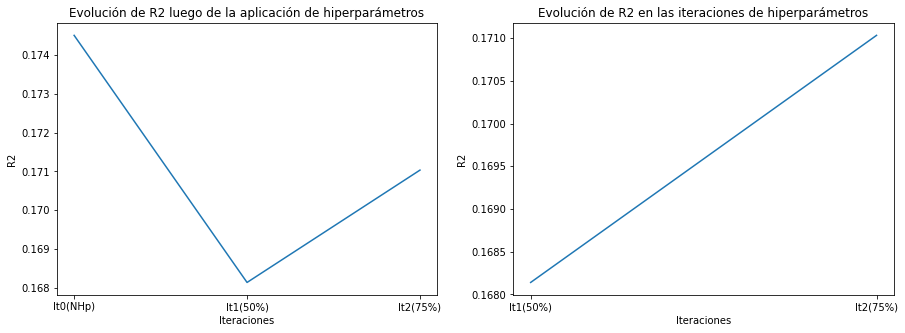

In [ ]:
# Graficamos la evolución de R2 en Decision Tree en función de las 'mallas iteradas'
decision_tree_x = ['It0(NHp)','It1(50%)','It2(75%)']
decision_tree_y = [0.17450471402131806,
                   0.16813948405426427,
                   0.171033606331929]

fig_decision_tree = plt.figure(figsize=(15,5))
fig_decision_tree.tight_layout()
ax1 = fig_decision_tree.add_subplot(1,2,1)
ax2 = fig_decision_tree.add_subplot(1,2,2)

ax1.plot(decision_tree_x,decision_tree_y)
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('Evolución de R2 luego de la aplicación de hiperparámetros')

decision_tree_x = ['It1(50%)','It2(75%)']
decision_tree_y = [0.16813948405426427,
                   0.171033606331929]

ax2.plot(decision_tree_x,decision_tree_y)
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('R2')
ax2.set_title('Evolución de R2 en las iteraciones de hiperparámetros')

plt.show()

#### Elastic Net

In [ ]:
# Resumen medida de calidad R2 y de hiperparámetros
print("R2 (NHp):\t 0.009981895761327908")
print("R2 (50%):\t 0.10442910561333707" + '\talpha:\t0.0001' + '\t\tl1_ratio:\t0' + '\t\tmax_iter:\t5000')
print("R2 (75%):\t 0.1033440307815483" + '\talpha:\t0.0001' + '\t\tl1_ratio:\t0.1' + '\t\tmax_iter:\t5000')
print("R2(100%):\t 0.10468790020118968" + '\talpha:\t0.0001' + '\t\tl1_ratio:\t0.3' + '\t\tmax_iter:\t1000')

R2 (NHp):	 0.009981895761327908
R2 (50%):	 0.10442910561333707	alpha:	0.0001		l1_ratio:	0		max_iter:	5000
R2 (75%):	 0.1033440307815483	alpha:	0.0001		l1_ratio:	0.1		max_iter:	5000
R2(100%):	 0.10468790020118968	alpha:	0.0001		l1_ratio:	0.3		max_iter:	1000


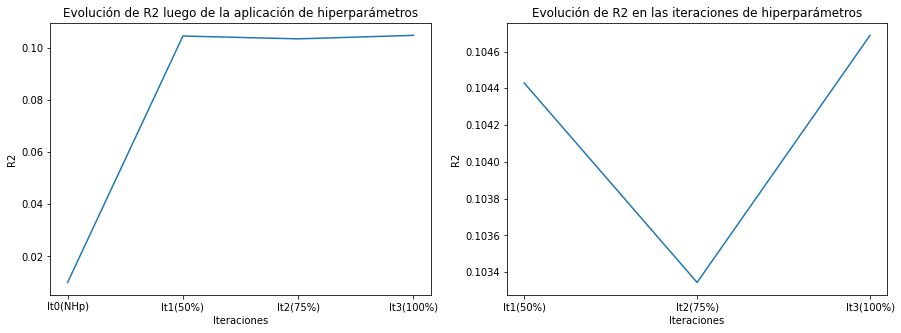

In [ ]:
# Graficamos la evolución de R2 en Elastic-Net en función de las 'mallas iteradas'
elastic_net_x = ['It0(NHp)','It1(50%)','It2(75%)','It3(100%)']
elastic_net_y = [0.009981895761327908,
                 0.10442910561333707,
                 0.1033440307815483,
                 0.10468790020118968]

fig_elastic = plt.figure(figsize=(15,5))
fig_elastic.tight_layout()
ax1 = fig_elastic.add_subplot(1,2,1)
ax2 = fig_elastic.add_subplot(1,2,2)

ax1.plot(elastic_net_x,elastic_net_y)
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('Evolución de R2 luego de la aplicación de hiperparámetros')

elastic_net_x = ['It1(50%)','It2(75%)','It3(100%)']
elastic_net_y = [0.10442910561333707,
                 0.1033440307815483,
                 0.10468790020118968]

ax2.plot(elastic_net_x,elastic_net_y)
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('R2')
ax2.set_title('Evolución de R2 en las iteraciones de hiperparámetros')

plt.show()

#### KNN Regressor

In [ ]:
# Resumen medida de calidad R2 y de hiperparámetros
print("R2 (NHp):\t 0.02509253048300697")
print("R2 (50%):\t 0.13297296615984344" + '\tmetric:\teuclidean' +'\t\tn_neighbors:\t19'+'\t\tweights:\tdistance')
print("R2 (75%):\t 0.1442843675657174" + '\tmetric:\teuclidean' +'\t\tn_neighbors:\t25'+'\t\tweights:\tdistance')
print("R2(100%):\t 0.16407655546155608" + '\tmetric:\teuclidean' +'\t\tn_neighbors:\t50'+'\t\tweights:\tdistance')

R2 (NHp):	 0.02509253048300697
R2 (50%):	 0.13297296615984344	metric:	euclidean		n_neighbors:	19		weights:	distance
R2 (75%):	 0.1442843675657174	metric:	euclidean		n_neighbors:	25		weights:	distance
R2(100%):	 0.16407655546155608	metric:	euclidean		n_neighbors:	50		weights:	distance


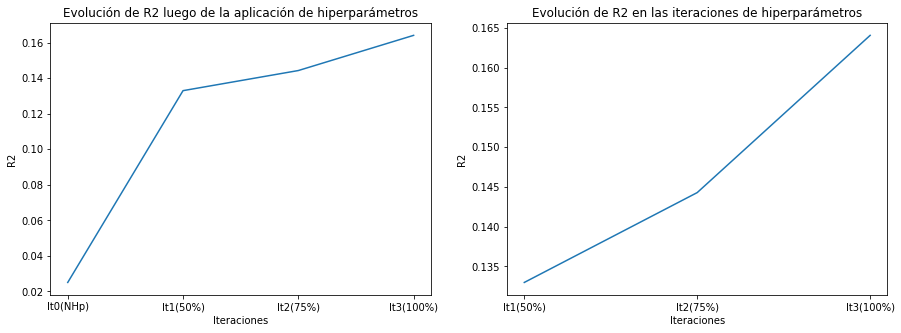

In [ ]:
# Graficamos la evolución de R2 en KNN en función de las 'mallas iteradas'
knn_x = ['It0(NHp)','It1(50%)','It2(75%)','It3(100%)']
knn_y = [0.02509253048300697,
         0.13297296615984344,
         0.1442843675657174,
         0.16407655546155608]

fig_knn = plt.figure(figsize=(15,5))
fig_knn.tight_layout()
ax1 = fig_knn.add_subplot(1,2,1)
ax2 = fig_knn.add_subplot(1,2,2)         

ax1.plot(knn_x,knn_y)
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('Evolución de R2 luego de la aplicación de hiperparámetros')

knn_x = ['It1(50%)','It2(75%)','It3(100%)']
knn_y = [0.13297296615984344,
         0.1442843675657174,
         0.16407655546155608]

ax2.plot(knn_x,knn_y)
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('R2')
ax2.set_title('Evolución de R2 en las iteraciones de hiperparámetros')

plt.show()

#### Random Forest Regressor

In [ ]:
# Resumen medida de calidad R2 y de hiperparámetros
print("R2 (NHp):\t 0.17645029261570266")
print("R2 (50%):\t 0.17202358638085735" + '\tn_estimators:\t130' +'\t\tn_jobs:\t5'+'\t\tmax_features:\tsqrt')
print("R2 (75%):\t 0.17430080629345146" + '\tn_estimators:\t134' +'\t\tn_jobs:\t-1'+'\t\tmax_features:\tsqrt')
print("R2(100%):\t 0.17665324127475546" + '\tn_estimators:\t145' +'\t\tn_jobs:\t1'+'\t\tmax_features:\tsqrt')

R2 (NHp):	 0.17645029261570266
R2 (50%):	 0.17202358638085735	n_estimators:	130		n_jobs:	5		max_features:	sqrt
R2 (75%):	 0.17430080629345146	n_estimators:	134		n_jobs:	-1		max_features:	sqrt
R2(100%):	 0.17665324127475546	n_estimators:	145		n_jobs:	1		max_features:	sqrt


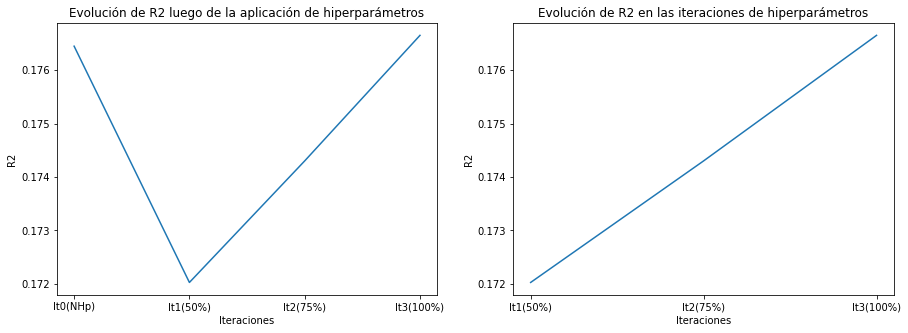

In [ ]:
# Graficamos la evolución de R2 en Random Forest en función de las 'mallas iteradas'
random_forest_x = ['It0(NHp)','It1(50%)','It2(75%)','It3(100%)']
random_forest_y = [0.17645029261570266,
                   0.17202358638085735,
                   0.17430080629345146,
                   0.17665324127475546]

fig_random_forest = plt.figure(figsize=(15,5))
fig_random_forest.tight_layout()
ax1 = fig_random_forest.add_subplot(1,2,1)
ax2 = fig_random_forest.add_subplot(1,2,2)         

ax1.plot(random_forest_x,random_forest_y)
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('Evolución de R2 luego de la aplicación de hiperparámetros')

random_forest_x = ['It1(50%)','It2(75%)','It3(100%)']
random_forest_y = [0.17202358638085735,
                   0.17430080629345146,
                   0.17665324127475546]

ax2.plot(random_forest_x,random_forest_y)
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('R2')
ax2.set_title('Evolución de R2 en las iteraciones de hiperparámetros')

plt.show()